In [1]:
import pandas as pd

df = pd.read_csv('valeursfoncieres-2018.txt', delimiter='|',decimal=",")
df.shape
df.describe

C:\Users\Admin\AppData\Local\Temp\ipykernel_4832\418317142.py:3: DtypeWarning: Columns (14,18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('valeursfoncieres-2018.txt', delimiter='|',decimal=",")


<bound method NDFrame.describe of          Identifiant de document  Reference document  1 Articles CGI  \
0                            NaN                 NaN             NaN   
1                            NaN                 NaN             NaN   
2                            NaN                 NaN             NaN   
3                            NaN                 NaN             NaN   
4                            NaN                 NaN             NaN   
...                          ...                 ...             ...   
3335287                      NaN                 NaN             NaN   
3335288                      NaN                 NaN             NaN   
3335289                      NaN                 NaN             NaN   
3335290                      NaN                 NaN             NaN   
3335291                      NaN                 NaN             NaN   

         2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
0                   NaN   

In [3]:
df.columns
nb_valeurs = df['Valeur fonciere'].shape[0]
print("Le nombre total de lignes dans la colonne 'Valeur fonciere' est :", nb_valeurs)


Le nombre total de lignes dans la colonne 'Valeur fonciere' est : 3335292


In [4]:
# Calculer le pourcentage des valeurs manquantes par colonne
pourcentage_valeurs_manquantes = (df.isna().sum() / len(df)) * 100

# Afficher le résultat
print("Pourcentage des valeurs manquantes par colonne :")
print(pourcentage_valeurs_manquantes)

Pourcentage des valeurs manquantes par colonne :
Identifiant de document       100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.959646
No voie                        42.015632
B/T/Q                          95.655433
Type de voie                   43.358782
Code voie                       0.909995
Voie                            0.910595
Code postal                     0.915002
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.650906
Section                         0.002549
No plan                         0.000000
No Volum

In [5]:
# Filtrer les colonnes avec plus de 60% de valeurs manquantes
plussoixante = pourcentage_valeurs_manquantes[pourcentage_valeurs_manquantes > 60].index
# Filtrer les colonnes avec moins de 60% de valeurs manquantes
moinssoixante= pourcentage_valeurs_manquantes[pourcentage_valeurs_manquantes < 60]
# Afficher les noms des colonnes avec plus de 60% de valeurs manquantes
print("Colonnes avec plus de 60% de valeurs manquantes :")
print(plussoixante)
# Afficher les noms des colonnes avec moins de 60% de valeurs manquantes
print("Colonnes avec moins de 60% de valeurs manquantes :")
print(moinssoixante)

Colonnes avec plus de 60% de valeurs manquantes :
Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'B/T/Q', 'Prefixe de section', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Identifiant local', 'Nature culture speciale'],
      dtype='object')
Colonnes avec moins de 60% de valeurs manquantes :
No disposition                0.000000
Date mutation                 0.000000
Nature mutation               0.000000
Valeur fonciere               0.959646
No voie                      42.015632
Type de voie                 43.358782
Code voie                     0.909995
Voie                          0.910595
Code postal                   0.915002
Commune                       0.00000

In [6]:
# Supprimer les colonnes sélectionnées du DataFrame
df = df.drop(columns=plussoixante)

In [17]:
#On vérifie le type de données dans les colonnes que l'on veut concatener
print(df['Date mutation'].dtypes)
print(df['Code voie'].dtypes)
# Utilise la méthode .apply pour concaténer les deux colonnes et créer une nouvelle colonne
df['Concat'] = df['Date mutation'].astype(str) + df['Code voie'].astype(str)
# Affiche le DataFrame pour vérifier les résultats
print(df['Concat'])

object
object
0          03/01/20181660
2          04/01/20180025
3          04/01/20180025
4          04/01/20180025
5          04/01/20180025
                ...      
3335287    28/12/20182012
3335288    03/12/20187561
3335289    28/12/20188548
3335290    13/12/20186559
3335291    17/10/20188525
Name: Concat, Length: 2872422, dtype: object


In [19]:
# On utilise la méthode drop_duplicates pour supprimer les lignes identiques de la colonne "Concat"
df = df.drop_duplicates(subset=['Concat'])
print(df['Concat'])

0          03/01/20181660
2          04/01/20180025
6          04/01/2018B034
9          10/01/2018B077
10         12/01/2018B135
                ...      
3335285    28/12/20180797
3335286    26/12/20185702
3335288    03/12/20187561
3335289    28/12/20188548
3335290    13/12/20186559
Name: Concat, Length: 605794, dtype: object


In [8]:
# Obtenir le nombre de communes différentes dans la colonne "commune"
communes = df['Commune'].nunique()
print(communes)
# Compter le nombre d'occurrences de chaque commune dans la colonne "commune"
nb_communes = df['Commune'].value_counts()

# Afficher le résultat
print("Nombre d'occurrences de chaque commune dans la colonne 'commune' :")
print(nb_communes)


31178
Nombre d'occurrences de chaque commune dans la colonne 'commune' :
Commune
TOULOUSE                         27052
NICE                             16672
NANTES                           16149
MONTPELLIER                      15371
BORDEAUX                         14569
                                 ...  
FELCE                                1
FUSTEROUAU                           1
SAINT PIERRE LES FRANQUEVILLE        1
LAROCHE-PRES-FEYT                    1
PARGNY LES BOIS                      1
Name: count, Length: 31178, dtype: int64


In [9]:
# Obtenir les noms des 20 communes les plus fréquentes
top_20_communes = nb_communes.head(20)

# Afficher le résultat
print("Les 20 communes les plus fréquentes dans la colonne 'commune' :")
print(top_20_communes)


Les 20 communes les plus fréquentes dans la colonne 'commune' :
Commune
TOULOUSE            27052
NICE                16672
NANTES              16149
MONTPELLIER         15371
BORDEAUX            14569
LILLE               12719
RENNES              12102
SAINT-ETIENNE        8797
PARIS 15             8180
VILLEURBANNE         8125
NIMES                7633
DIJON                7517
ANGERS               7364
GRENOBLE             6872
ROUEN                6854
TOURS                6667
REIMS                6562
NANCY                6546
CLERMONT FERRAND     6461
PARIS 16             6447
Name: count, dtype: int64


In [10]:
# Obtenir les noms des 20 communes les moins fréquentes
petites_communes = nb_communes.tail(20)

# Afficher le résultat
print("Les 20 communes les moins fréquentes dans la colonne 'commune' :")
print(petites_communes)

Les 20 communes les moins fréquentes dans la colonne 'commune' :
Commune
LAHITERE                         1
ECHAY                            1
ZINCOURT                         1
ST MAUR DES FOSSES               1
RUSIO                            1
BELLOC SAINT-CLAMENS             1
LAFAUCHE                         1
SOMME-BIONNE                     1
VERSEILLES-LE-HAUT               1
BOUSSEY                          1
LA CHAPELLE DU BOURGAY           1
DOMMARIEN                        1
ARGUEL                           1
DEVEZE                           1
SAINT-DIDIER-SOUS-ECOUVES        1
FELCE                            1
FUSTEROUAU                       1
SAINT PIERRE LES FRANQUEVILLE    1
LAROCHE-PRES-FEYT                1
PARGNY LES BOIS                  1
Name: count, dtype: int64


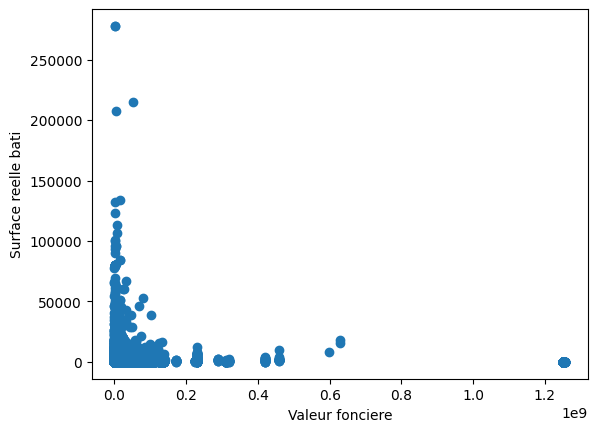

In [28]:
import matplotlib.pyplot as plt

# Créer un nuage de points avec les colonnes "Valeur fonciere" et "Surface reelle bati"
plt.scatter(df['Valeur fonciere'], df['Surface reelle bati'])

# Ajouter des labels aux axes
plt.xlabel('Valeur fonciere')
plt.ylabel('Surface reelle bati')

# Afficher le graphique
plt.show()


In [11]:
# Supprimer les lignes où la colonne "Surface reelle bati" est égale à 0
df = df[df['Surface reelle bati'] != 0]

In [12]:
#df['Nature mutation'].value_counts()
#df['Nature culture'].value_counts()


Nature mutation
Vente                                 2603837
Vente en l'état futur d'achèvement     195024
Echange                                 46023
Vente terrain à bâtir                   13408
Adjudication                            11605
Expropriation                            2525
Name: count, dtype: int64

Nature culture
S     973193
T     347367
P     178317
AB    129949
J     112202
BT     97544
L      93053
AG     74283
VI     41899
BR     34315
VE     25691
BS     16737
PA     15965
B      12681
E       9172
BP      7545
BF      4726
PP      2399
PC      1961
CH      1461
PH      1354
BM      1249
CA       862
LB       358
TP       106
PE        73
BO        41
Name: count, dtype: int64

In [ ]:
#Supprimer les lignes en double -> concatener date et code voie 
#Classer types de bien
#Supprimer les lignes sans valeurs foncières
#Afficher tableau croisé (nature culture - type local) et voir si on supprimer les données à 0
#Voir les différentes valeurs de type local
#Prédiction sur les valeurs foncières => enrichir avec les prix ou n° des communes
#Ajouter longitude et latitude en reliant avec le cp
#KNNImputer

#regression:
#Ridge: plus le Alpha est grand plus les coefficients sont homogènes ce qui évite le surapprentissage (trouver avec un Gridsearch)
#Lasso: plus le Alpha est grand plus les coefficients sont proches de 0
#ElasticNet: mélange de ridge et du lasso

#SMOTE: 
